# Attribute information For bank dataset

   Input variables:
   ## bank client data:
   - age (numeric)
   - job : type of job (categorical : "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services") 
   - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   - education (categorical: "unknown","secondary","primary","tertiary")
   - default: has credit in default? (binary: "yes","no")
   - balance: average yearly balance, in euros (numeric) 
   - housing: has housing loan? (binary: "yes","no")
   - loan: has personal loan? (binary: "yes","no")
   ## related with the last contact of the current campaign:
   - contact: contact communication type (categorical: "unknown","telephone","cellular") 
   - day: last contact day of the month (numeric)
   - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   - duration: last contact duration, in seconds (numeric)
   ## other attributes:
   - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
   - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
   - previous: number of contacts performed before this campaign and for this client (numeric)
   - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  ### Output variable (desired target):
   - y - has the client subscribed a term deposit? (binary: "yes","no")

Missing Attribute Values: None

- Output variable -> y
- y -> Whether the client has subscribed a term deposit or not 
- Binomial ("yes" or "no")


In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#loading data set
bank = pd.read_csv('bank-full.csv', delimiter = ';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
#print concise summery of the dataset
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
#Shape of the data set
bank.shape

(45211, 17)

In [6]:
bank = bank.dropna()
bank.shape

(45211, 17)

In [7]:
#since the dataset contain null values also 
#count total rows in each column which contain null values
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
#'duplicated()' function in pandas return the duplicate row as True and othter as False
#for counting the duplicate elements we sum all the rows
sum(bank.duplicated())

0

In [9]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


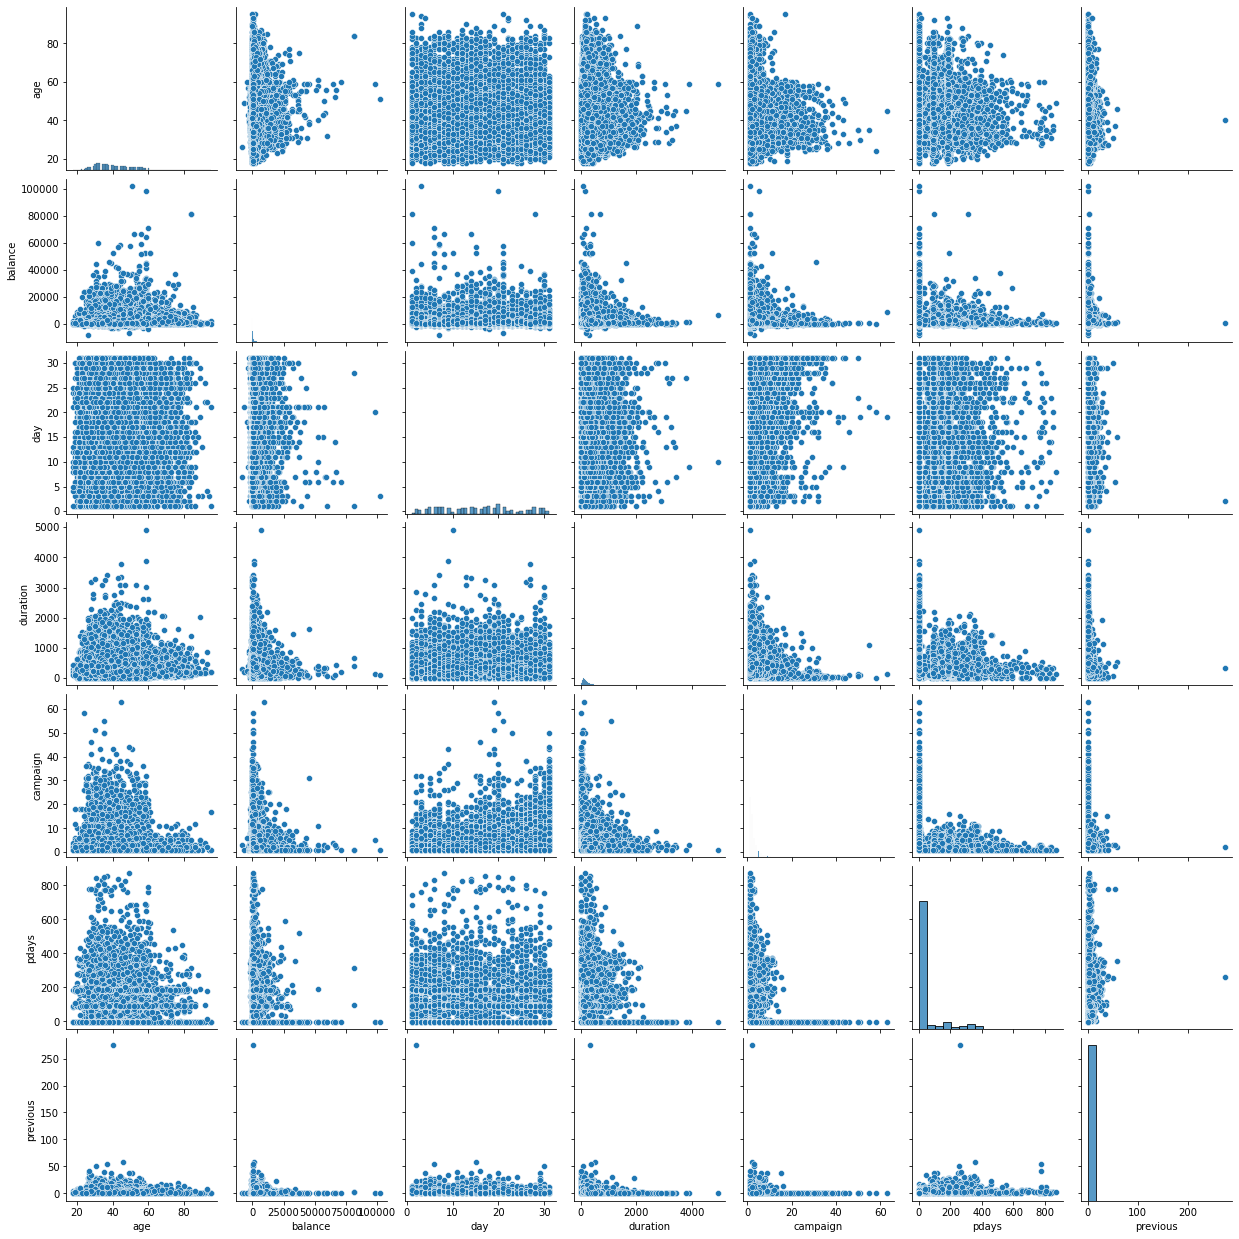

In [10]:
sns.pairplot(bank)

In [11]:
bank['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

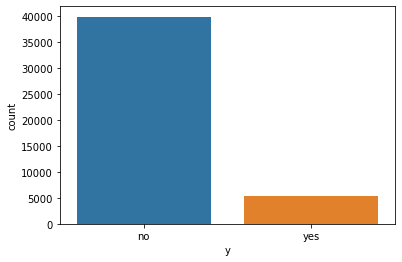

In [12]:
sns.countplot(x = 'y', data = bank)

##### Checking for outliers:

<AxesSubplot:title={'center':'age'}, xlabel='y'>

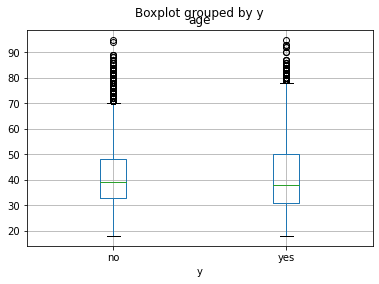

In [13]:
bank.boxplot(column='age', by='y')

Text(0, 0.5, 'Frequency of Purchase')

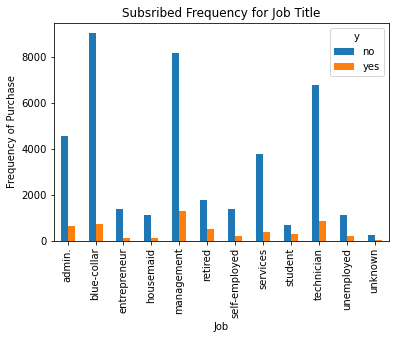

In [14]:
pd.crosstab(bank['job'], bank['y']).plot(kind = 'bar')
plt.title('Subsribed Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

##### All occupations have different term deposit subscriptions. So, this is an important feature

Text(0, 0.5, 'Proportion of Customers')

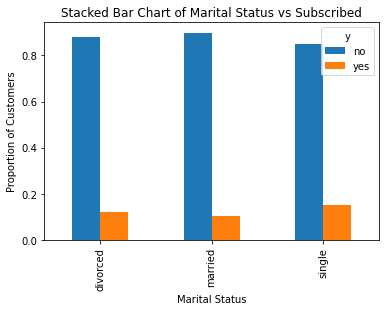

In [15]:
table=pd.crosstab(bank['marital'],bank['y'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False)
plt.title('Stacked Bar Chart of Marital Status vs Subscribed')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

##### People from all status levels, have the same frequency. So, this is not an important feature

Text(0, 0.5, 'Proportion of Customers')

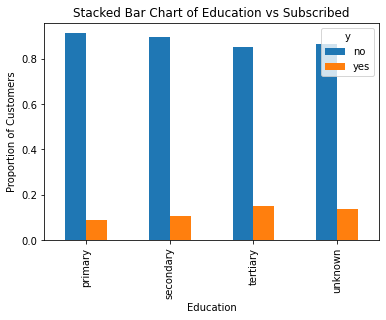

In [16]:
table=pd.crosstab(bank.education,bank.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar')
plt.title('Stacked Bar Chart of Education vs Subscribed')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')

##### People with tertiary education, tend to get subscription to term deposit, a little more than people from other education background

Text(0, 0.5, 'Frequency of Subsribe')

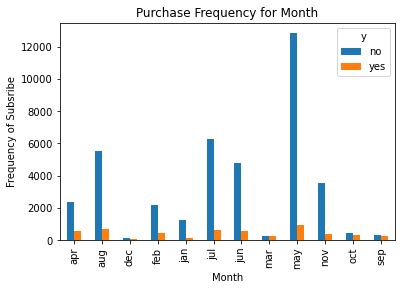

In [17]:
pd.crosstab(bank.month,bank.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Subsribe')

##### People tend to get term deposit mostly in the month of May

Text(0, 0.5, 'Frequency of Subscribe')

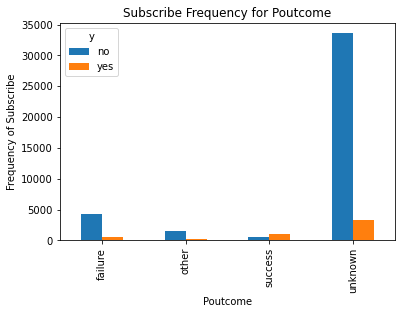

In [18]:
pd.crosstab(bank.poutcome,bank.y).plot(kind='bar')
plt.title('Subscribe Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Subscribe')

##### The remaining column features:
- The day column - Refers to the last contact day of the month, hard to say, if the client will subscirbe to term deposit or not
- The campaign column - varies from client to client. Thus, it is not important feature
- The pdays column - They dont contribute in predicting if the client subscribe to term deposit or not
##### Dropping all the unimportant features form the data, before constructing a model

In [19]:
bank.drop(["month","education","pdays","day","campaign","age",'loan',"housing",'marital'],axis=1,inplace=True)

In [20]:
bank.head()

,job,default,balance,contact,duration,previous,poutcome,y
0,management,no,2143,unknown,261,0,unknown,no
1,technician,no,29,unknown,151,0,unknown,no
2,entrepreneur,no,2,unknown,76,0,unknown,no
3,blue-collar,no,1506,unknown,92,0,unknown,no
4,unknown,no,1,unknown,198,0,unknown,no


In [21]:
# Encode columns into numeric

from sklearn.preprocessing import LabelEncoder

for column in bank.columns:
    le = LabelEncoder()
    bank[column] = le.fit_transform(bank[column])

In [22]:
bank.head()

,job,default,balance,contact,duration,previous,poutcome,y
0,4,0,3036,2,261,0,3,0
1,9,0,945,2,151,0,3,0
2,2,0,918,2,76,0,3,0
3,1,0,2420,2,92,0,3,0
4,11,0,917,2,198,0,3,0


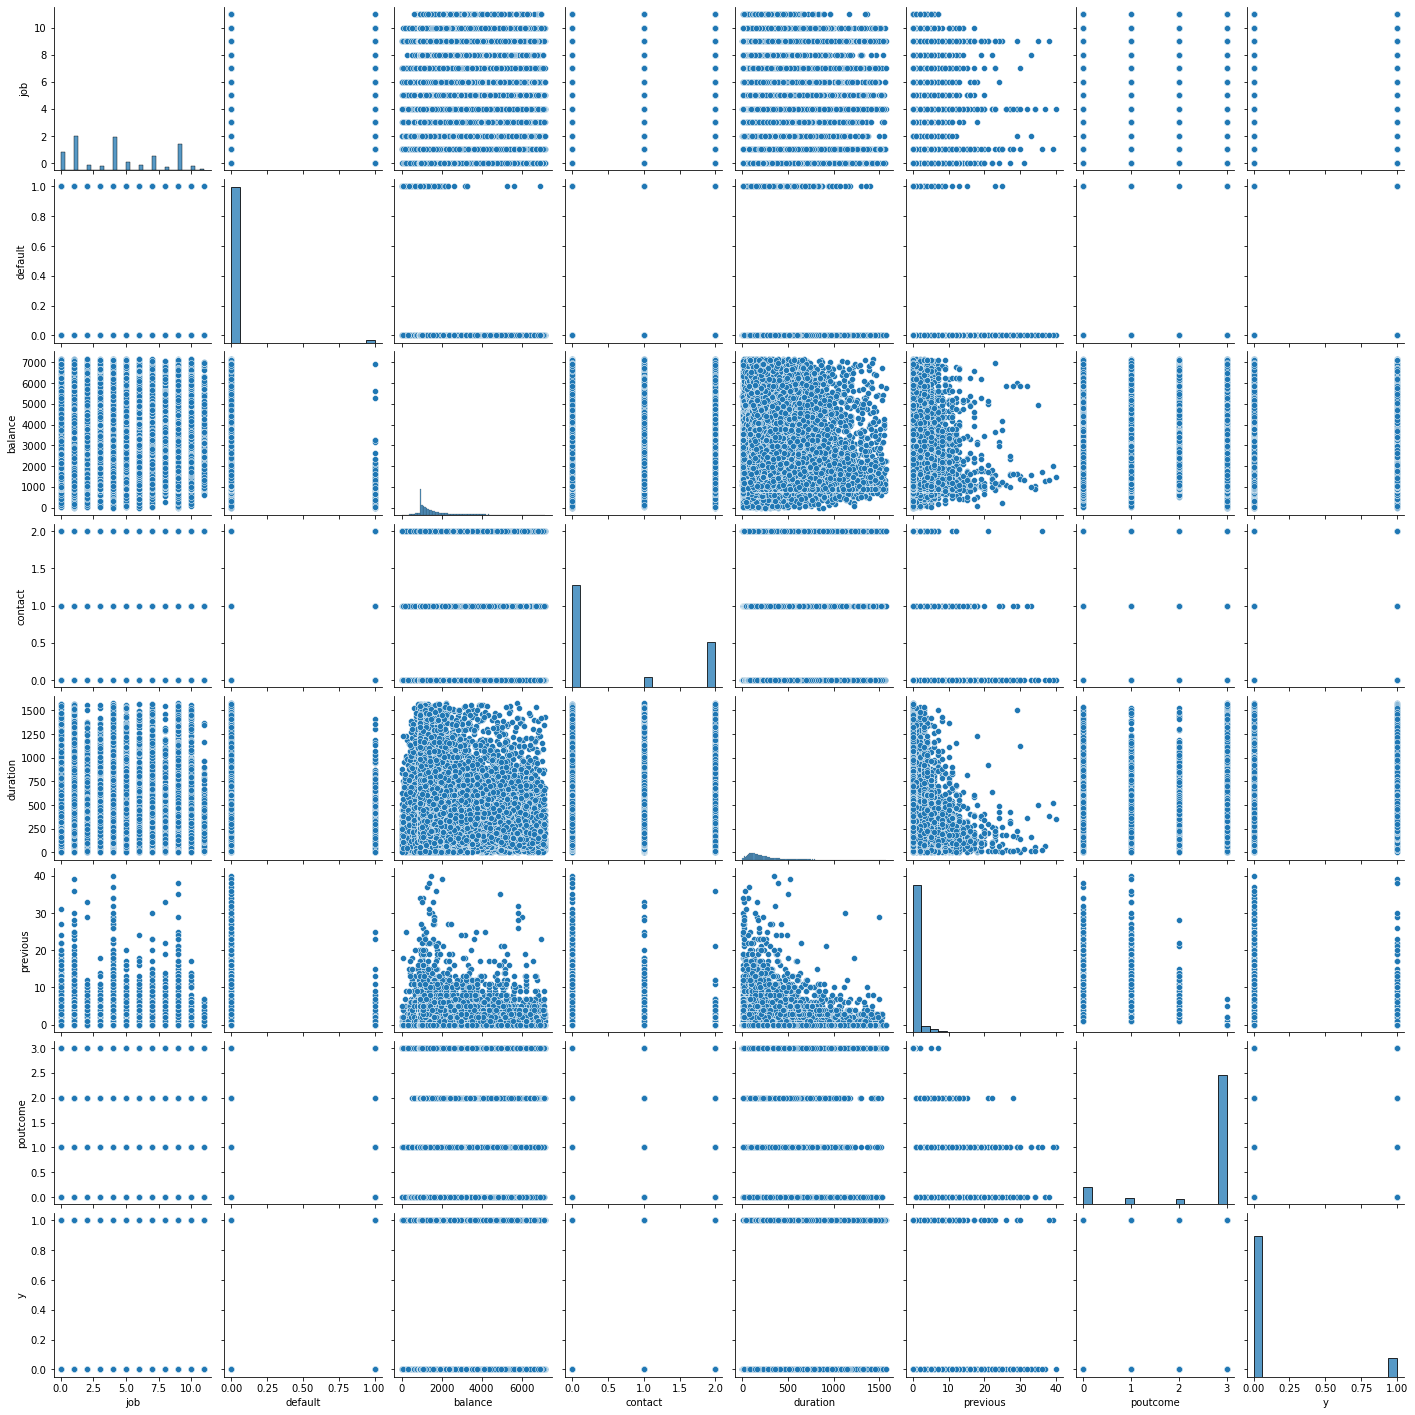

In [23]:
sns.pairplot(bank)

In [24]:
#Dividing our data into input and output variables
X = bank.iloc[:, :7]
Y = bank.iloc[:, 7]

In [25]:
#Logistic regression and fit model
classifier = LogisticRegression()
classifier.fit(X, Y)

LogisticRegression()

In [26]:
#Predict for X dataset
y_pred = classifier.predict(X)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [27]:
y_pred_df = pd.DataFrame({'actual' : Y, 'predicted_prob' : classifier.predict(X)})
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


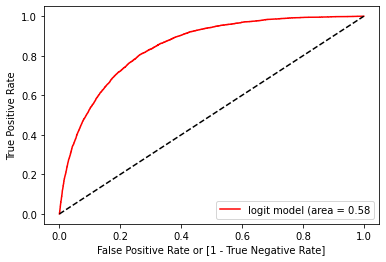

In [28]:
#ROC Curve

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:, 1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, color='red', label='logit model (area = %0.2f'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [29]:
auc

0.5842743439516094

In [30]:
#Confusion Matrix for the model accuracy

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

confusion_matrix = confusion_matrix(Y, y_pred)
accuracy = accuracy_score(Y, y_pred)
print('Confusion Matrix', '\n', confusion_matrix)
print('Accuracy Score', '\n', accuracy*100)

Confusion Matrix 
 [[39231   691]
 [ 4306   983]]
Accuracy Score 
 88.94738006237421


In [31]:
#Manual Calculation 
((39231+983)/(39231+691+4306+983))*100

88.94738006237421

In [32]:
#Classification Report

from sklearn.metrics import classification_report

print(classification_report(Y, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.59      0.19      0.28      5289

    accuracy                           0.89     45211
   macro avg       0.74      0.58      0.61     45211
weighted avg       0.86      0.89      0.86     45211



## Inference

1 - Confusion Matrix  
The result is telling us that we have 39231+983 correct predictions and 4306+691 incorrect predictions

2 - Accuracy == 89%  
From the given data set, 89% of clients will subscribe